<a href="https://colab.research.google.com/github/danishmahmoodali/Deep-Learning-Projects/blob/main/Classification/Classification_on_Games_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Danish Mahmood Ali

B18101028

In [ ]:
!gdown --id 1Ske8PEDGYEcJ5zJAy0YuIcEJ3e1QpzxW

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
#reading from csv data file into dataframe
df=pd.read_csv('/content/game_sale_data.csv',encoding = "ISO-8859-1")

df


,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017
...,...,...,...,...,...,...,...,...,...
19595,19594,FirePower for Microsoft Combat Flight Simulator 3,PC,GMX Media,Shockwave Productions,NaN,NaN,0.01,2004
19596,19595,Tom Clancy's Splinter Cell,PC,Ubisoft,Ubisoft,9.4,NaN,0.01,2003
19597,19596,Ashita no Joe 2: The Anime Super Remix,PS2,Capcom,Capcom,NaN,NaN,0.01,2002
19598,19597,Tokyo Yamanote Boys for V: Main Disc,PSV,Rejet,Rejet,NaN,NaN,0.01,2017


In [ ]:
null_values = df[df.Critic_Score.isnull()&df.User_Score.isnull()]
df = df.dropna(subset=['Critic_Score'])
df

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017
...,...,...,...,...,...,...,...,...,...
19561,19560,The Spiderwick Chronicles,PC,Sierra Entertainment,Stormfront Studios,7.5,7.5,0.01,2008
19583,19582,Super Meat Boy,PS4,Team Meat,Team Meat,8.5,7.0,0.01,2016
19592,19591,Nancy Drew: The Deadly Secret of Olde World Park,DS,Majesco,Gorilla Systems,7.0,7.0,0.01,2007
19594,19593,Donkey Kong,3DS,Nintendo,Nintendo,8.5,8.5,0.01,2011


In [ ]:
cs_mean=df['Critic_Score'].mean()
u_mean=df['User_Score'].mean()
diff = cs_mean - u_mean
diff = round(diff,1)

#filling null values
df['User_Score'] = df.User_Score.fillna(value= diff+df.Critic_Score)

#new column to be used for classification
df['1Mil_Shipped'] = df['Total_Shipped']>1
df['1Mil_Shipped']=df['1Mil_Shipped'].astype(int)

df

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year,1Mil_Shipped
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006,1
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985,1
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012,1
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008,1
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017,1
...,...,...,...,...,...,...,...,...,...,...
19561,19560,The Spiderwick Chronicles,PC,Sierra Entertainment,Stormfront Studios,7.5,7.5,0.01,2008,0
19583,19582,Super Meat Boy,PS4,Team Meat,Team Meat,8.5,7.0,0.01,2016,0
19592,19591,Nancy Drew: The Deadly Secret of Olde World Park,DS,Majesco,Gorilla Systems,7.0,7.0,0.01,2007,0
19594,19593,Donkey Kong,3DS,Nintendo,Nintendo,8.5,8.5,0.01,2011,0


In [ ]:
#information regarding data attributes

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9969 entries, 0 to 19596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           9969 non-null   int64  
 1   Name           9969 non-null   object 
 2   Platform       9969 non-null   object 
 3   Publisher      9969 non-null   object 
 4   Developer      9967 non-null   object 
 5   Critic_Score   9969 non-null   float64
 6   User_Score     9969 non-null   float64
 7   Total_Shipped  9969 non-null   float64
 8   Year           9969 non-null   int64  
 9   1Mil_Shipped   9969 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 856.7+ KB
None
               Rank  Critic_Score   User_Score  Total_Shipped         Year  \
count   9969.000000   9969.000000  9969.000000    9969.000000  9969.000000   
mean    7791.091082      7.034848     6.928268       0.845675  2007.482696   
std     5310.406929      1.558968     1.598373       2.242538

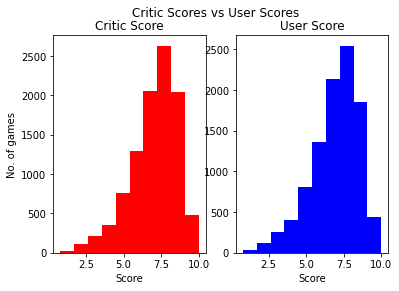

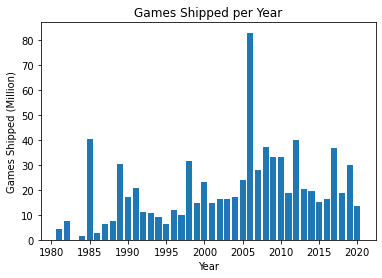

In [ ]:
#diffrent data description and visualization functions

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(x=df['Critic_Score'],color='r')
ax2.hist(x=df['User_Score'], color = 'b')
fig.suptitle('Critic Scores vs User Scores')
ax1.set_title('Critic Score')
ax2.set_title('User Score')
ax1.set_xlabel('Score')
ax2.set_xlabel('Score')
ax1.set_ylabel('No. of games')
plt.show()


plt.bar(x='Year',height='Total_Shipped',data=df)
plt.title("Games Shipped per Year")
plt.xlabel("Year")
plt.ylabel("Games Shipped (Million)")
plt.show()



In [ ]:
def outlier_func(df1, _debug=False):
    """
    Takes a dataframe df of numerical features and returns a dict of column names and outlier counts.
    """
    outlier_dict = {}
    outlier_list = []
    for col in df1:
        Q1 = np.percentile(df1[col], 25)
        Q3 = np.percentile(df1[col], 75)
        IQR = Q3 - Q1
        outlier_list = (df1[(df1[col] < Q1 - 1.5 * IQR) |
                        (df1[col] > Q3 + 1.5 * IQR)].index)
        if _debug:
            print(col, ' contains ', len(outlier_list), '(', len(
                outlier_list)/len(df1[col]), ') outliers, out of ', len(df1[col]))
        outlier_dict[col] = outlier_list
    return outlier_dict


input = [col for col in df.columns if df[col].dtypes != 'O']
outlier_df = outlier_func(df[input], _debug=True)

Rank  contains  0 ( 0.0 ) outliers, out of  9969
Critic_Score  contains  149 ( 0.014946333634266225 ) outliers, out of  9969
User_Score  contains  177 ( 0.017755040625940414 ) outliers, out of  9969
Total_Shipped  contains  1054 ( 0.10572775604373558 ) outliers, out of  9969
Year  contains  34 ( 0.0034105727756043734 ) outliers, out of  9969
1Mil_Shipped  contains  1931 ( 0.19370047146153074 ) outliers, out of  9969


In [ ]:
X = df[['Critic_Score','User_Score']]
y = df['1Mil_Shipped']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
X_train

,Critic_Score,User_Score
14701,4.8,4.3
7333,4.5,4.5
515,8.8,7.3
1896,7.0,7.0
9414,7.7,7.7
...,...,...
8452,6.0,6.0
7482,7.7,7.6
7835,6.8,6.8
992,6.0,6.0


In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.19047619, -1.38095238],
       [-1.33333333, -1.28571429],
       [ 0.71428571,  0.04761905],
       ...,
       [-0.23809524, -0.19047619],
       [-0.61904762, -0.57142857],
       [-0.9047619 , -0.85714286]])

Logisitic Regression Accuracy: 0.8047475760615179
Logistic Regression Confusion Matrix:
[[2369    9]
 [ 575   38]]
Logistic Regression Cross validated ROC AUC : 0.7518854772414794


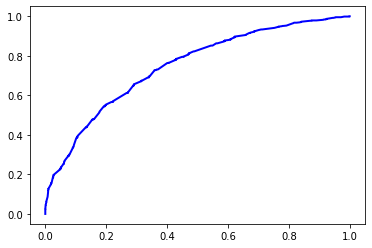

In [ ]:
#Generating Logistic Regression Classifier

model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
LR_pred = model.predict(X_test)
LR_accuracy = accuracy_score(y_test, LR_pred)
print("Logisitic Regression Accuracy: " + str(LR_accuracy))

#Generate confusion matrix
LR_cm = confusion_matrix(y_test,LR_pred)
print("Logistic Regression Confusion Matrix:" + '\n' + str(LR_cm))

#Plot ROC
LR_pred1 = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, LR_pred1)
plt.plot(fpr, tpr, linewidth=2, c='b', label="Logistic Regression")

#Calculate ROC Area under the curve
LR_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Logistic Regression Cross validated ROC AUC : ' + str(LR_auc))

Decision Tree Entropy Accuracy: 0.8004012036108324
Decision Tree Entropy Confusion Matrix:
[[2274  104]
 [ 493  120]]
Decision Tree Entropy Cross validated ROC AUC : 0.6790478021152557


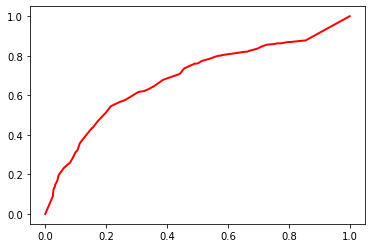

In [ ]:
#Generating Decision Tree (Entropy) Classifier
model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model.fit(X_train,y_train)
DTE_pred = model.predict(X_test)
DTE_accuracy = accuracy_score(y_test, DTE_pred)
print("Decision Tree Entropy Accuracy: " + str(DTE_accuracy))

#Generate confusion matrix
DTE_cm = confusion_matrix(y_test,DTE_pred)
print("Decision Tree Entropy Confusion Matrix:" + '\n' + str(DTE_cm))

#Plot ROC
DTE_pred1 = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, DTE_pred1)
plt.plot(fpr, tpr, linewidth=2, c='r', label="Decision Tree Entropy")

#Calculate ROC Area under the curve
DTE_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Decision Tree Entropy Cross validated ROC AUC : ' + str(DTE_auc))

Decision Tree Gini Accuracy: 0.8000668672684721
Decision Tree Gini Confusion Matrix:
[[2273  105]
 [ 493  120]]
Decision Tree Gini Cross validated ROC AUC : 0.6768335923253277


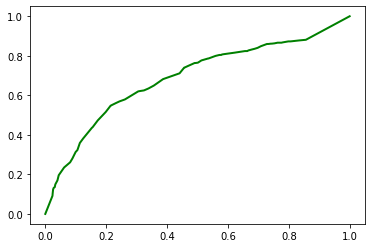

In [ ]:
#Generating Decision Tree (GINI) Classifier
model = tree.DecisionTreeClassifier(criterion = 'gini',random_state=0)
model.fit(X_train,y_train)
DTG_pred = model.predict(X_test)
DTG_accuracy = accuracy_score(y_test, DTG_pred)
print("Decision Tree Gini Accuracy: " + str(DTG_accuracy))

#Generate confusion matrix
DTG_cm = confusion_matrix(y_test,DTG_pred)
print("Decision Tree Gini Confusion Matrix:" + '\n' + str(DTG_cm))

#Plot ROC
DTG_pred1 = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, DTG_pred1)
plt.plot(fpr, tpr, linewidth=2, c='g', label="Decision Tree Gini")

#Calculate ROC Area under the curve
DTG_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Decision Tree Gini Cross validated ROC AUC : ' + str(DTG_auc))

Naive Bayes Accuracy: 0.7963891675025075
Naive Bayes Confusion Matrix:
[[2186  192]
 [ 417  196]]
Naive Bayes Cross validated ROC AUC : 0.7320829284833991


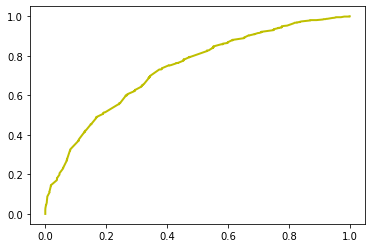

In [ ]:
#Generating Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train,y_train)
NB_pred = model.predict(X_test)
NB_accuracy = accuracy_score(y_test, NB_pred)
print("Naive Bayes Accuracy: " + str(NB_accuracy))

#Generate confusion matrix
NB_cm = confusion_matrix(y_test,NB_pred)
print("Naive Bayes Confusion Matrix:" + '\n' + str(NB_cm))

#Plot ROC
NB_pred1 = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, NB_pred1)
plt.plot(fpr, tpr, linewidth=2, c='y', label="Naive Bayes")

#Calculate ROC Area under the curve
NB_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Naive Bayes Cross validated ROC AUC : ' + str(NB_auc))

Random Forest Accuracy: 0.8004012036108324
Random Forest Confusion Matrix:
[[2268  110]
 [ 487  126]]
Random Forest Cross validated ROC AUC : 0.7242575189615322


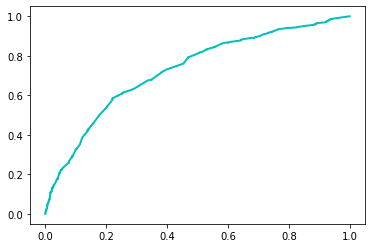

In [ ]:
#Generating Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
RF_pred = model.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_pred)
print("Random Forest Accuracy: " + str(RF_accuracy))

#Generate confusion matrix
RF_cm = confusion_matrix(y_test,RF_pred)
print("Random Forest Confusion Matrix:" + '\n' + str(RF_cm))

#Plot ROC
RF_pred1 = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, RF_pred1)
plt.plot(fpr, tpr, linewidth=2, c='c', label="Random Forest")

#Calculate ROC Area under the curve
RF_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Random Forest Cross validated ROC AUC : ' + str(RF_auc))

Support Vector Machine Accuracy: 0.8077566031427617
Support Vector Machine Confusion Matrix:
[[2345   33]
 [ 542   71]]
Support Vector Machine Cross validated ROC AUC : 0.6513684423980226


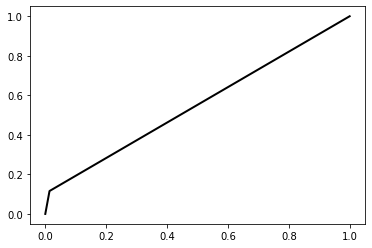

In [ ]:
#Generating Support Vector Machine Classifier
model = SVC(gamma='auto')
model.fit(X_train,y_train)
SVC_pred = model.predict(X_test)
SVC_accuracy = accuracy_score(y_test, SVC_pred)
print("Support Vector Machine Accuracy: " + str(SVC_accuracy))

#Generate confusion matrix
SVC_cm = confusion_matrix(y_test,SVC_pred)
print("Support Vector Machine Confusion Matrix:" + '\n' + str(SVC_cm))

#Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, SVC_pred)
plt.plot(fpr, tpr, linewidth=2, c='k', label="Support Vector Machine")

#Calculate ROC Area under the curve
SVC_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Support Vector Machine Cross validated ROC AUC : ' + str(SVC_auc))

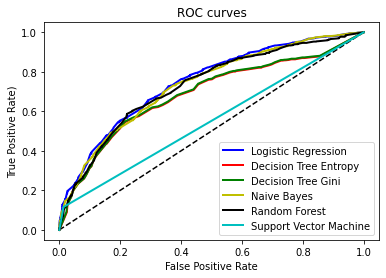

In [ ]:
models = ['Logistic Regression', 'Decision Tree Entropy', 'Decision Tree Gini', 'Naive Bayes', 'Random Forest', 'SVM']
accuracys = [LR_accuracy, DTE_accuracy, DTG_accuracy, NB_accuracy, RF_accuracy, SVC_accuracy]


plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate)')


fpr, tpr, thresholds = roc_curve(y_test, LR_pred1)
plt.plot(fpr, tpr, linewidth=2, c='b', label="Logistic Regression")

fpr, tpr, thresholds = roc_curve(y_test, DTE_pred1)
plt.plot(fpr, tpr, linewidth=2, c='r', label="Decision Tree Entropy")

fpr, tpr, thresholds = roc_curve(y_test, DTG_pred1)
plt.plot(fpr, tpr, linewidth=2, c='g', label="Decision Tree Gini")

fpr, tpr, thresholds = roc_curve(y_test, NB_pred1)
plt.plot(fpr, tpr, linewidth=2, c='y', label="Naive Bayes")

fpr, tpr, thresholds = roc_curve(y_test, RF_pred1)
plt.plot(fpr, tpr, linewidth=2, c='k', label="Random Forest")

fpr, tpr, thresholds = roc_curve(y_test, SVC_pred)
plt.plot(fpr, tpr, linewidth=2, c='c', label="Support Vector Machine")

plt.legend(loc='lower right')

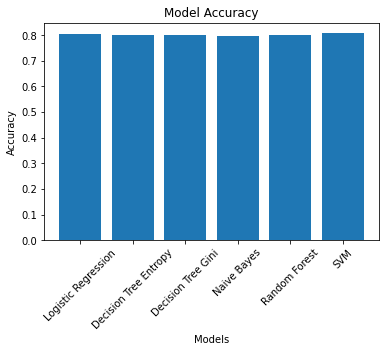

In [ ]:
plt.bar(x=models,height=accuracys )
plt.title("Model Accuracy"  )
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.show()

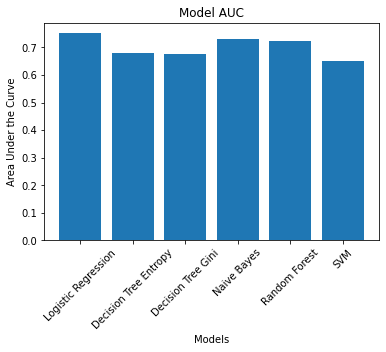

In [ ]:
auc = [LR_auc, DTE_auc, DTG_auc, NB_auc, RF_auc, SVC_auc]
plt.bar(x=models,height=auc )
plt.title("Model AUC")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylabel("Area Under the Curve")
plt.show()